# GPS Tracking of Birds

the data is from LifeWatch INBO project. The small data we're going to use is the migration data for 3 gulls named Eric, Nico, and Sanne.

tasks:
- Load the data 
- visualize some flight trajectories
- track flight speed
- learn about daytime
- ...

In [1]:
import pandas as pd

In [3]:
birddata = pd.read_csv("bird_tracking.csv")
birddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 4.3+ MB


In [5]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Flight trajectories Visualization

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
ix = birddata.bird_name == "Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix]

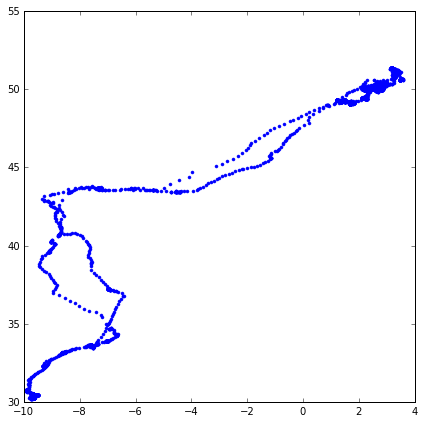

In [13]:
plt.figure(figsize=(7,7))
plt.plot(x, y , ".")

In [16]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

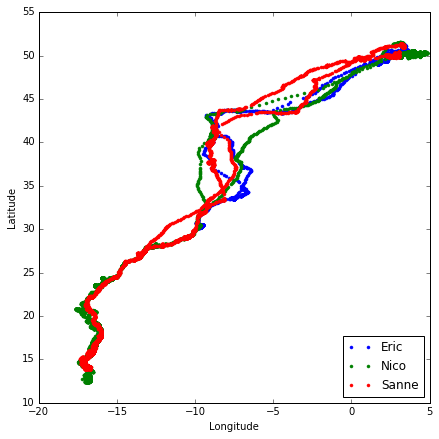

In [28]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y, ".", label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right");
plt.savefig("3traj.png")

### Examining Flight speed
speed_2d is an estimates of two dimensional speeds of the birds. That is how fast they were flying on a 2D plane that is a local approximation to the curved surface of the earth.


In [46]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
#must be at least one NaN in the speed array
np.isnan(speed).any()

True

In [47]:
# we sum over the boolean objects returned by np.isnan(speed)
# true:1 and false:0
np.sum(np.isnan(speed))

85

means 85 entries for Eric are not numeric

In [48]:
#find NaNS in the speed array
ind = np.isnan(speed) 
~ind

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
19765     True
19766     True
19767     True
19768     True
19769     True
19770     True
19771    False
19772     True
19773     True
19774     True
19775     True
19776     True
19777     True
19778    False
19779     True
19780     True
19781     True
19782     True
19783     True
19784     True
19785     True
19786     True
19787     True
19788     True
19789     True
19790     True
19791     True
19792     True
19793     True
19794     True
Name: speed_2d, dtype: bool

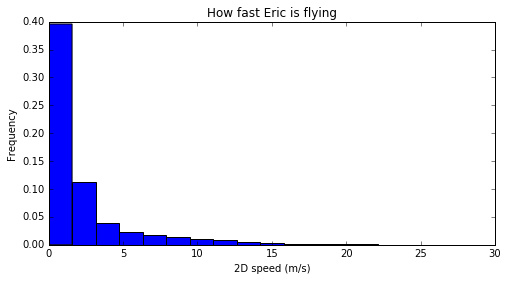

In [59]:
plt.figure(figsize=(8,4))
plt.hist(speed[~ind], bins=np.linspace(0,30,20), normed=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")
plt.title("How fast Eric is flying");

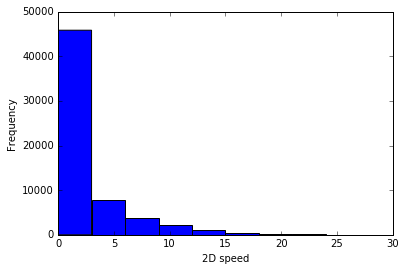

In [65]:
#plotting using pandas library
birddata.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel("2D speed")
plt.savefig("pd_hist.png")

In [67]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [68]:
import datetime

In [73]:
time_1 = datetime.datetime.today()
time_2 = datetime.datetime.today()
time_2-time_1

datetime.timedelta(0, 4, 765279)

In [74]:
# convert timestamps that are strings in our data to datetime object
date_str = birddata.date_time[0]
type(date_str)

str

In [75]:
date_str

'2013-08-15 00:18:08+00'

In [77]:
# +00 
date_str[:-3]

'2013-08-15 00:18:08'

In [80]:
# turn string to datetime object
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [84]:
timestamps = []
for k in range(len(birddata.date_time)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3],"%Y-%m-%d %H:%M:%S" ))
timestamps[:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [87]:
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [89]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [94]:
times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed_time = [time - times[0] for time in times]
elapsed_time[1000] / datetime.timedelta(days=1)

12.084722222222222

In [95]:
elapsed_time[1000] / datetime.timedelta(hours=1)

290.03333333333336

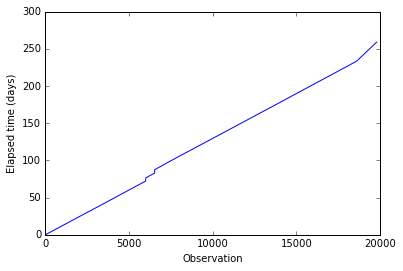

In [99]:
plt.plot(np.array(elapsed_time)/ datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.savefig("timeplot.png")

Calculating daily mean speed